In [230]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1.) Import Data from FRED

In [231]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [232]:
data.index = pd.to_datetime(data.index)

In [233]:
data.dropna(inplace =True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [234]:
split_1 = int(len(data)* .6)
split_2 = int(len(data)* .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[:split_2]

In [235]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [236]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)
X_out

,const,Unemployment,HousingStarts,Inflation
1997-12-01,1.0,4.7,1566.0,161.800
1998-01-01,1.0,4.6,1525.0,162.000
1998-02-01,1.0,4.6,1584.0,162.000
1998-03-01,1.0,4.7,1567.0,162.000
1998-04-01,1.0,4.3,1540.0,162.200
...,...,...,...,...
2017-01-01,1.0,4.7,1190.0,243.618
2017-02-01,1.0,4.6,1271.0,244.006
2017-03-01,1.0,4.4,1190.0,243.892
2017-04-01,1.0,4.4,1146.0,244.193


# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [237]:
model1 = sm.OLS (y_in,X_in).fit()

In [238]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        02:04:47   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529      0.000       1.540       5.410
Unemployment      0.5307      0.106      5.009      0.000       0.323       0.739
HousingStarts    -0.0005      0.000     -1.046      0.296      -0.001       0.000
Inflation         0.0077      0.004      2.173      0.030       0.001       0.015
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.849
Skew:                           1.039   Prob(JB):                     2.11e-27
Kurtosis:                       4.413   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.) Recreate the graph for your model

In [239]:
import matplotlib.pyplot as plt

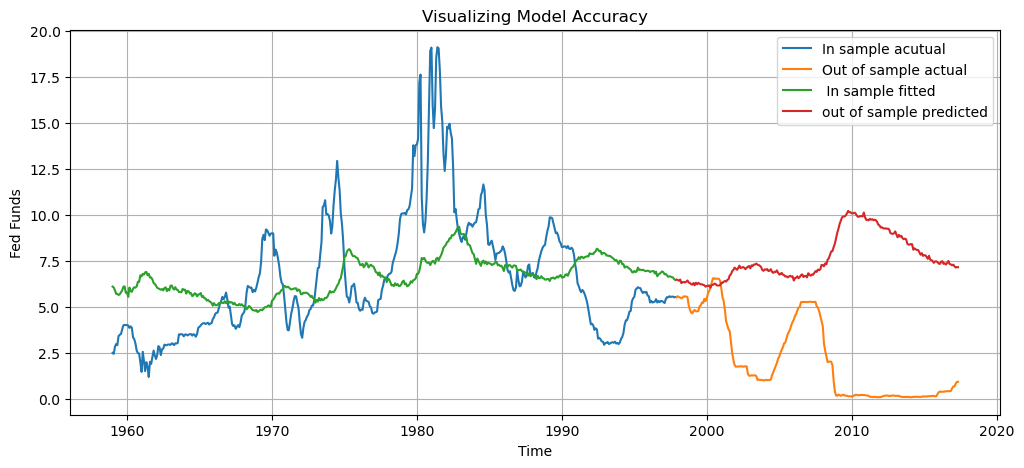

In [240]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In sample acutual", "Out of sample actual" ," In sample fitted", "out of sample predicted"])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [241]:
from sklearn.metrics import mean_squared_error

In [242]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [243]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

Degree:  1


/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

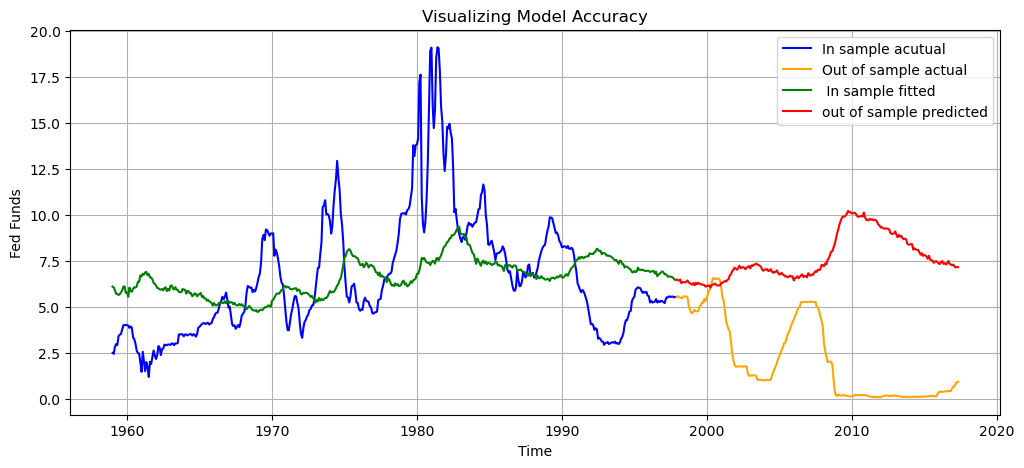

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565204
Degree:  2


/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

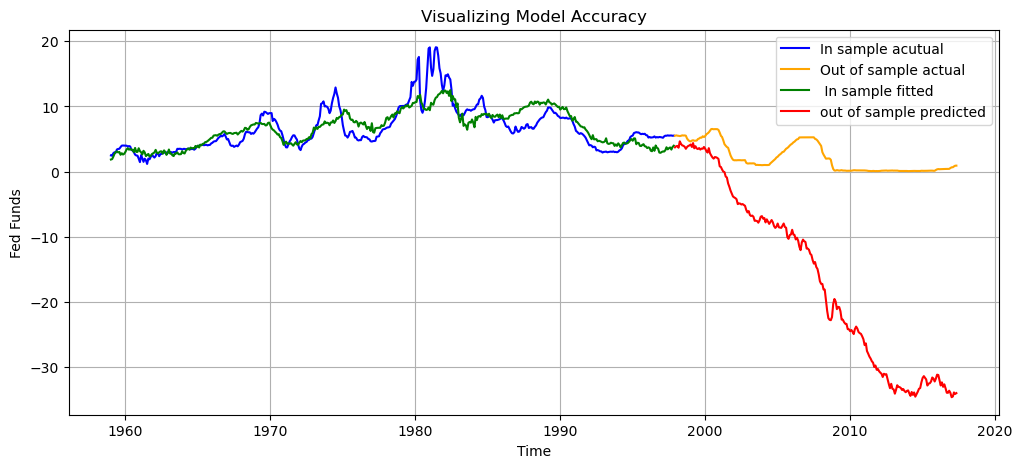

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024405
Degree:  3


/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

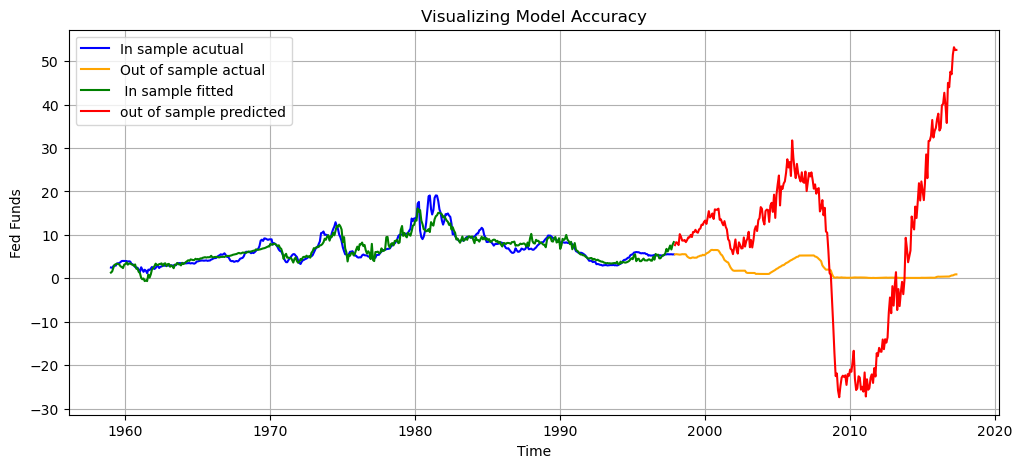

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744


In [244]:
from sklearn.preprocessing import PolynomialFeatures
max_degrees = 3
for degrees in range(1, max_degrees+1):
    print("Degree: ",degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))

    plt.plot(y_in, label = 'In-sample Actuals', color = 'blue')
    plt.plot(y_out, label = 'Out-of-sample Actuals', color = 'orange')

    in_pred = model1.predict(X_in_poly)
    out_pred = model1.predict(X_out_poly)
         
    plt.plot(y_in.index, in_pred, label='In-sample Prediction', color='green')
    plt.plot(y_out.index, out_pred, label='Out-of-sample Prediction', color='red')

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In sample acutual", "Out of sample actual" ," In sample fitted", "out of sample predicted"])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out,model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

The simplest model, degree=1, does not perform well. When increasing degrees=2, we see in sample fits data better, out of sample does not fitted well. The model, degree=3, has a lower MSE, model is getting overfit.

When the degrees go up, the model tends to be overfit, in sample MSE is decreasing, out of sample MSE is increasing.